In [1]:
from trueskill_manager import TrueskillManager
from dumper import Dumper
from bipedal_walker_wrapper import BipedalWalkerAgent
from database_utils import DatabaseManager
import sqlite3

from matplotlib import pyplot as plt

NUMBER_OF_LEVELS = 3

####################################################################
# model tuple = (environment_trained_on, model_id, expected_level)
####################################################################

agent = BipedalWalkerAgent()
dumper = Dumper()
db_manager = DatabaseManager()

def set_env(agent, level_id):
    if level_id == 0:
        agent.set_environment_type(super_easy=True)
    elif level_id == 1:
        agent.set_environment_type()
    elif level_id == 2:
        agent.set_environment_type(hardcore=True)
    else:
        print('Unkonwn level type')
        
def remove_model_from_db(model_id):
    model = models[model_id]
    db_manager.remove_player(model[1], str(model[2]))

def plot_(title, data, opps, save_plots=False):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    a1 = ax.plot(data[0])
    a2 = ax.plot(data[1])
    a3 = ax.plot(data[2])
    a4 = ax.plot(data[3])
    a5 = ax.scatter(range(1, len(opps)+1),opps)
    #a5 = ax.plot(opps)

    plt.legend((a1[0], a2[0], a3[0], a4[0], a5), ('Easy', 'Medium', 'Hard', 'Player', 'Chosen\nlevel'))
    
    if save_plots:
        path = './img/validation/'
        fig.savefig(path + title + '.png', bbox_inches='tight')
    
    plt.show()

In [2]:
def validate_trueskill(model, n_games, verbose=False):
    agent.set_model_difficulty(model[1])
    agent.load_model(model[2])
    t_manager = TrueskillManager(model[1], str(model[2]))

    data_to_plot = []
    opponents = []
    out = dumper.dump(model[1], str(model[2]), verbose=False)
    for i in range(len(out)):
        data_to_plot.append([])
        data_to_plot[i].append(out[i][3])
    

    for i in range(n_games):
        level_id = t_manager.choose_opponent()
        out = dumper.dump(model[1], str(model[2]), verbose=False)
        opponents.append(out[level_id][3])
        for i in range(len(out)):
            data_to_plot[i].append(out[i][3])
        
        set_env(agent, level_id)
        outcome, reward = agent.play(render=False)
        if verbose:
            print('Chosen level: {}'.format(level_id))
            print('Outcome: {} \t Reward: {}'.format(outcome, reward))
        t_manager.handle_game_outcome(outcome)
        
        
            
    final_opponent = t_manager.choose_opponent()
    print('Expected level: {}\nChosen level:{}'.format(model[3], final_opponent))
    outcome = 0
    if final_opponent == model[3]:
        outcome = 1
    return data_to_plot, outcome, opponents
    


In [3]:
conn = sqlite3.connect('./data/exploration.db')
cur = conn.cursor()
cur.execute('SELECT * FROM truth')

opponents = []
plot_list = []
outcome = 0
models = cur.fetchall()
for model in models:
    validation = validate_trueskill(model, 30)
    plot_list.append(validation[0])
    outcome += validation[1]
    opponents.append(validation[2])

conn.close()
%store models
%store plot_list
%store opponents

INFO:tensorflow:Restoring parameters from ./models/easy/model-160000.ckpt
Expected level: 2
Chosen level:1
INFO:tensorflow:Restoring parameters from ./models/easy/model-170000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-180000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-190000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-200000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-210000.ckpt
Expected level: 0
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-220000.ckpt
Expected level: 1
Chosen level:0
INFO:tensorflow:Restoring parameters from ./models/easy/model-230000.ckpt
Expected level: 1
Chosen level:2
INFO:tensorflow:Restoring parameters from ./models/easy/model-240000.ckpt
Expected level: 1
Chosen level:1
INFO:tensorflow:Restoring parameters 

In [4]:
perc = float(outcome / len(models))
print(perc)

0.8478260869565217


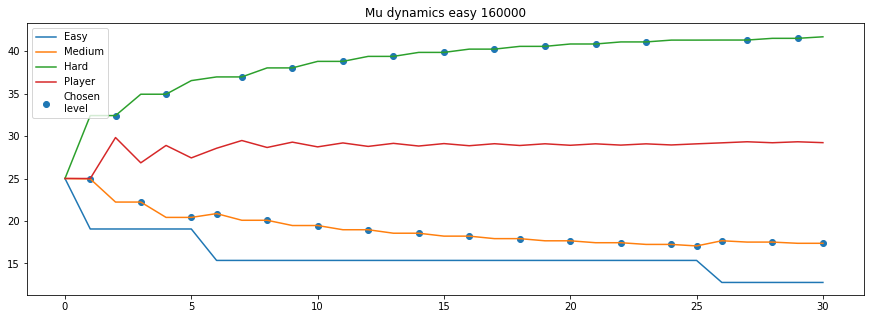

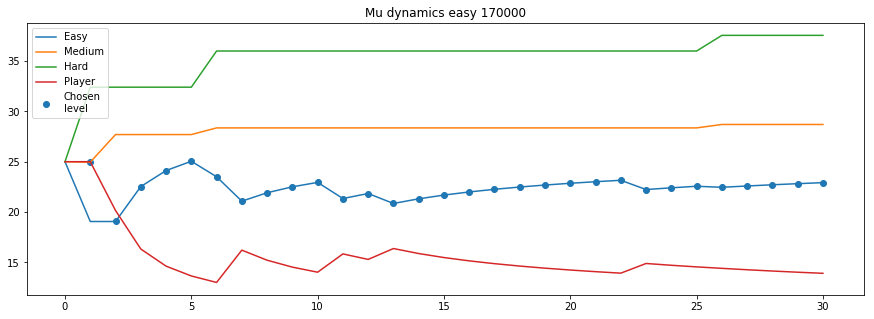

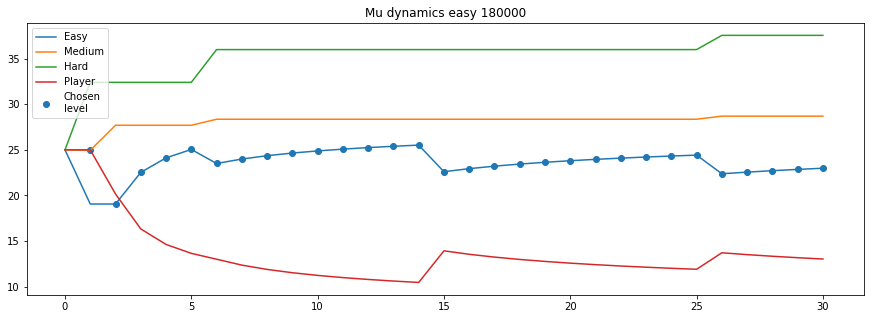

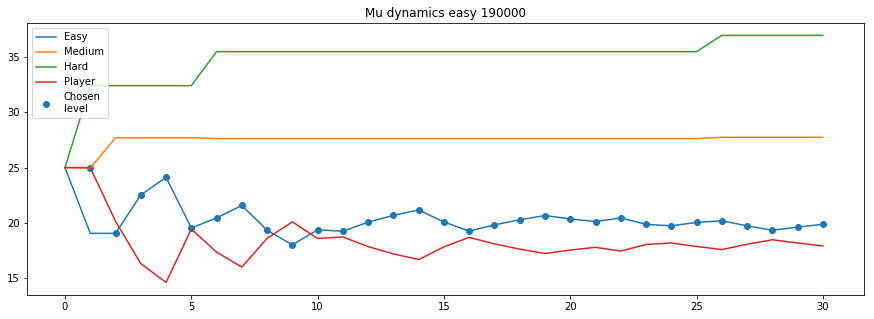

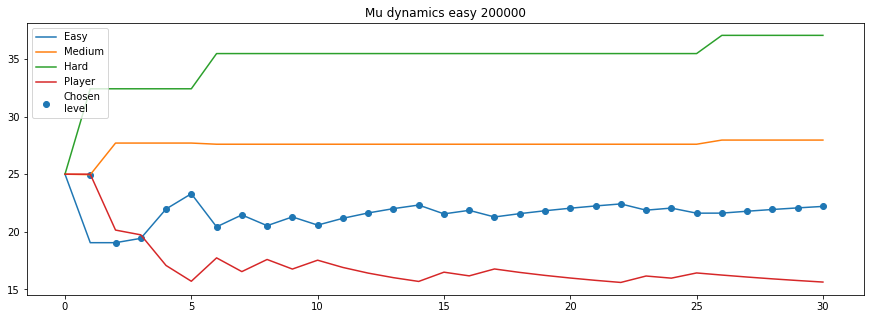

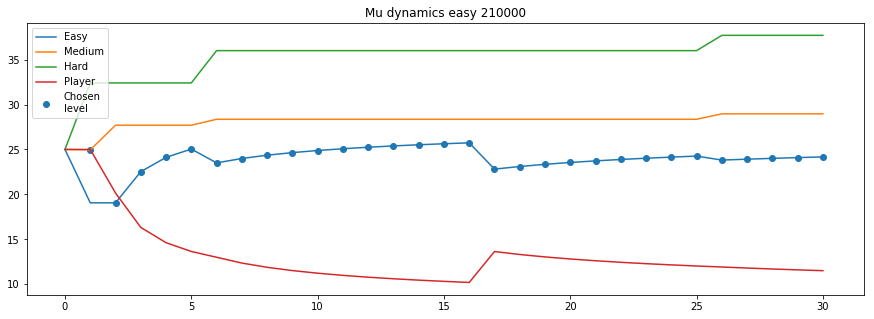

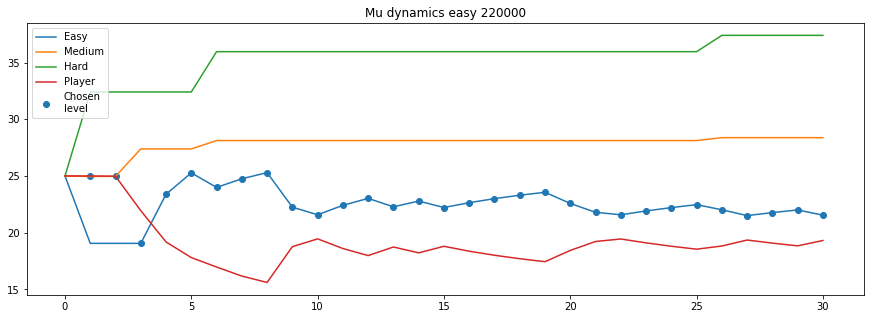

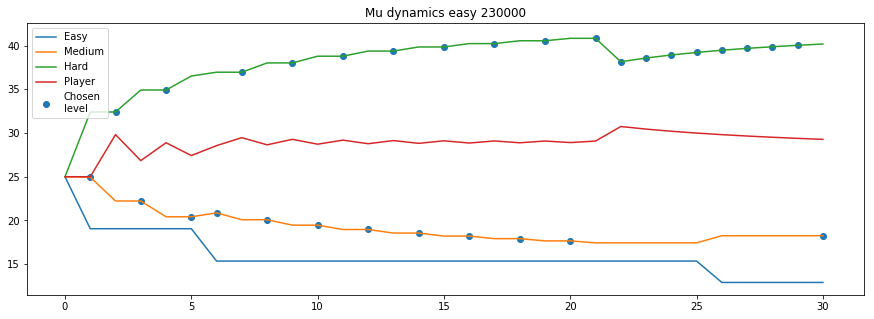

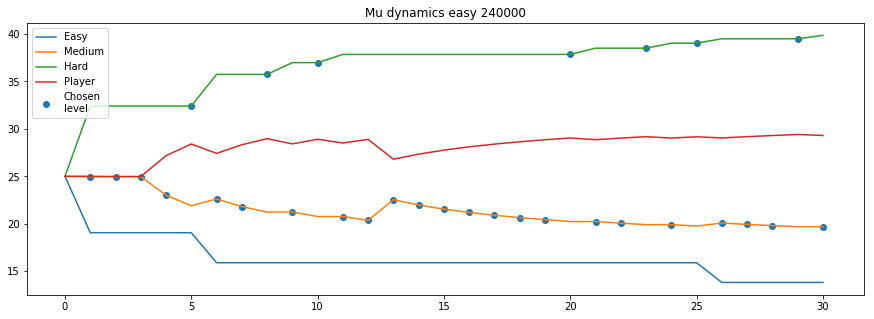

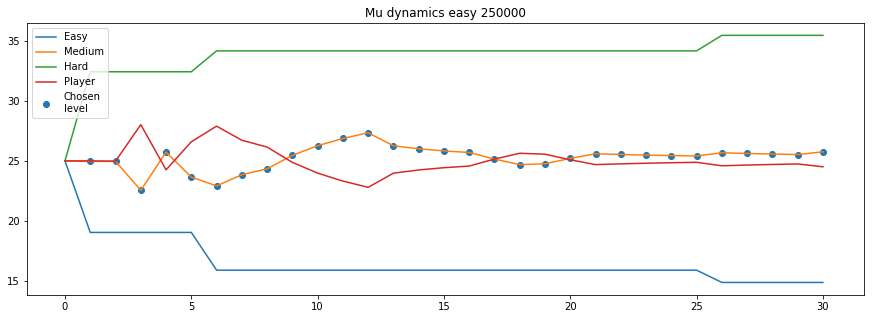

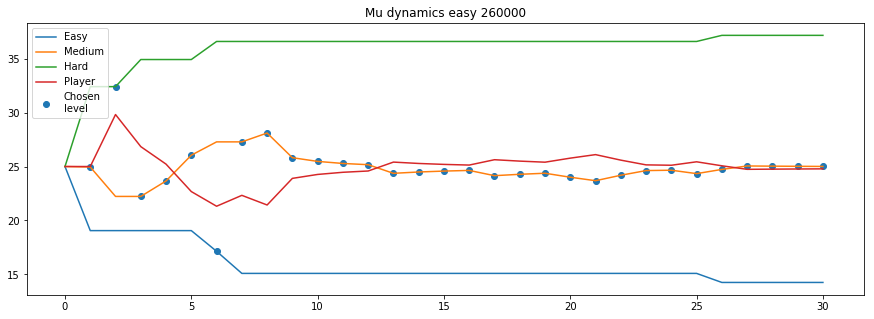

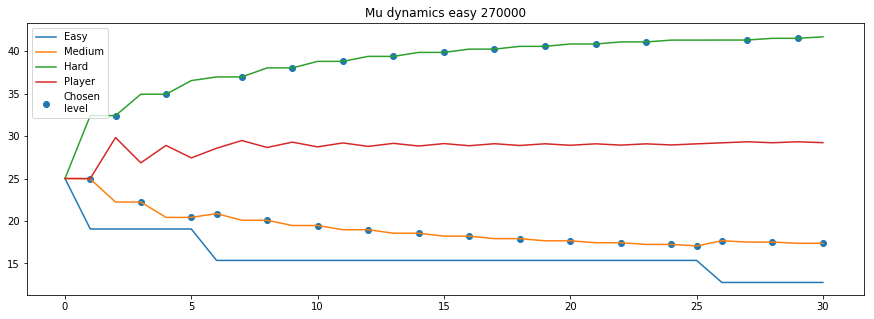

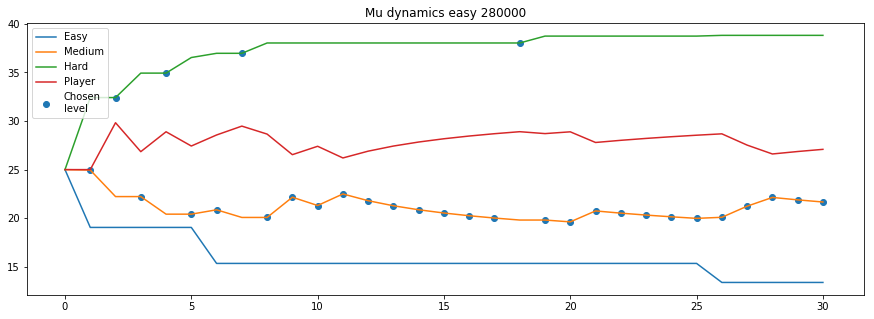

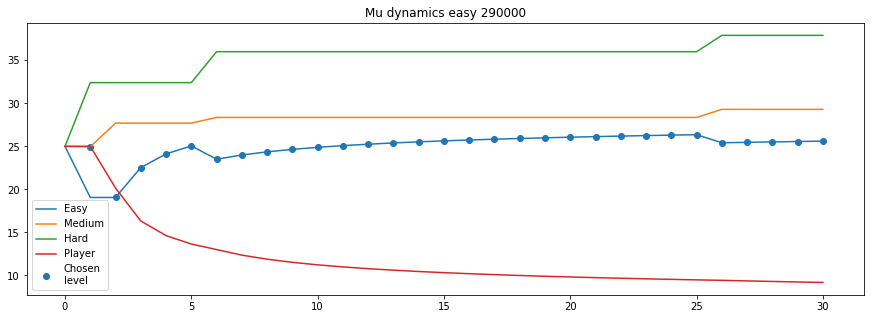

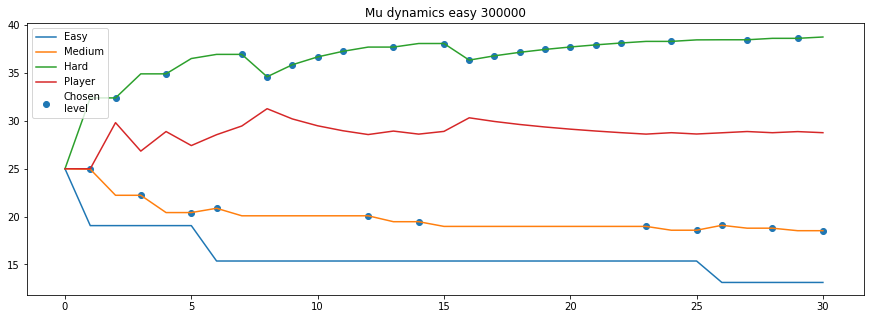

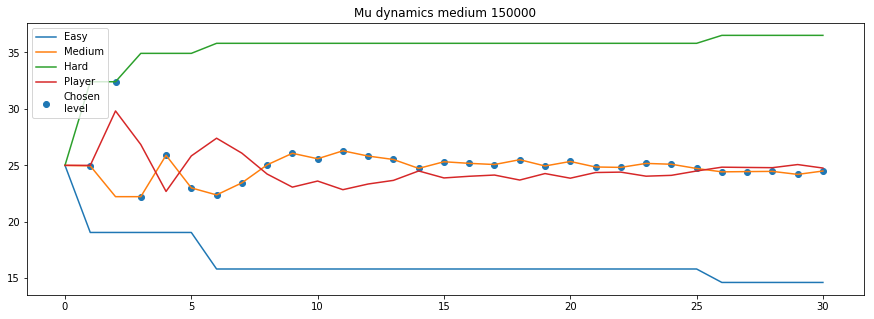

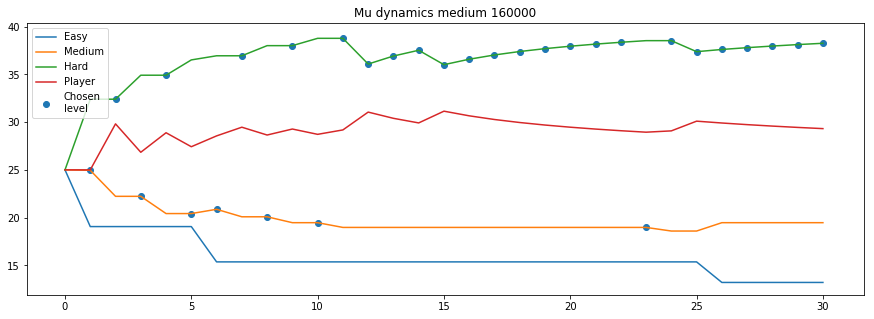

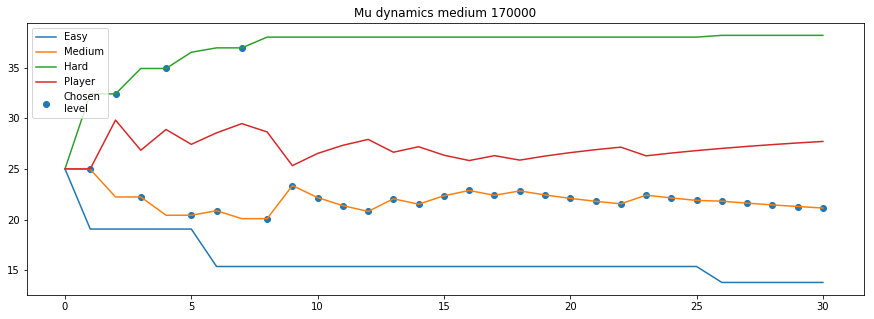

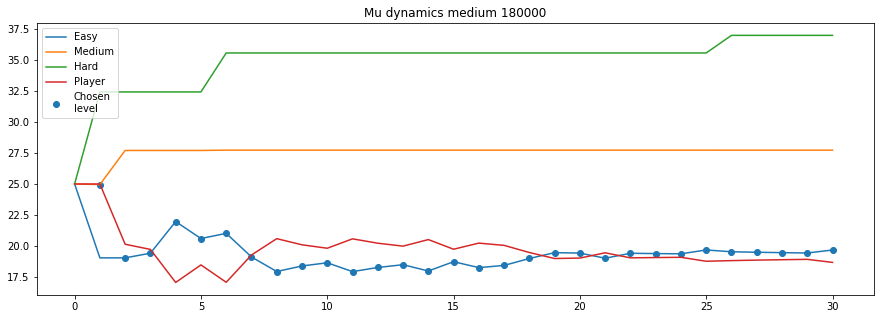

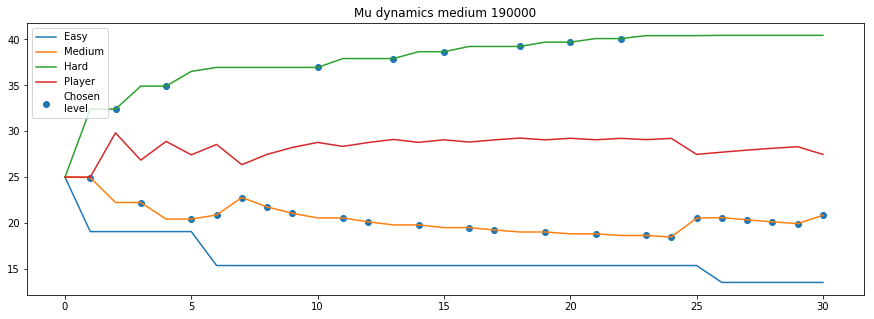

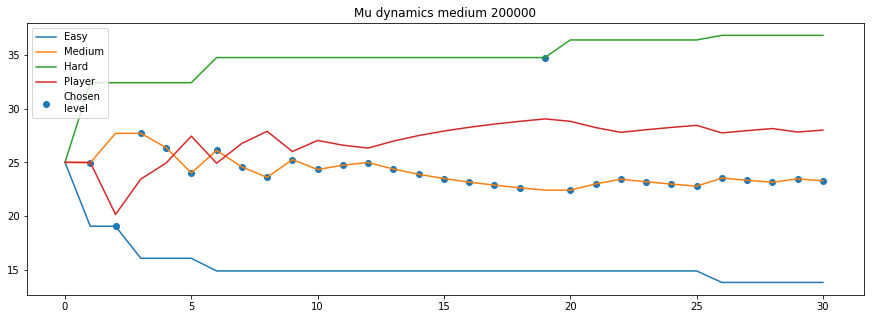

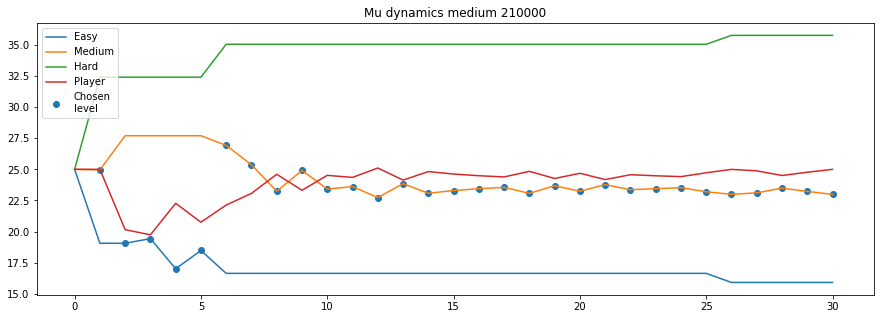

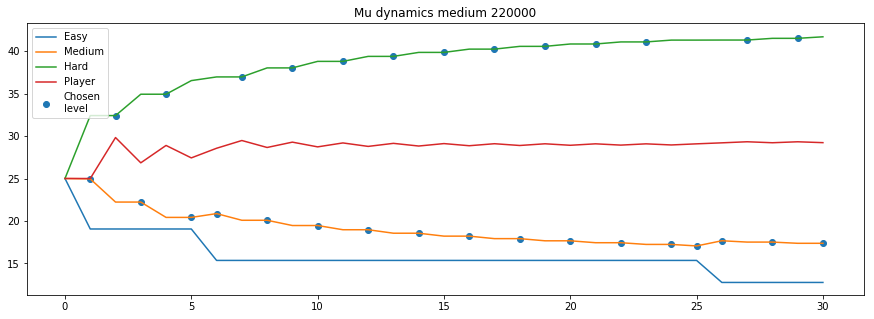

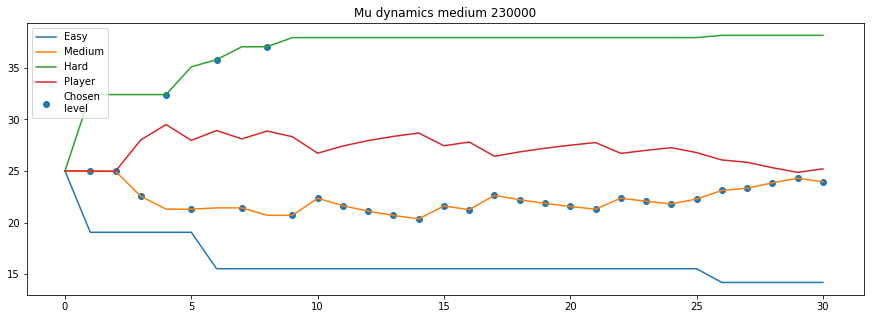

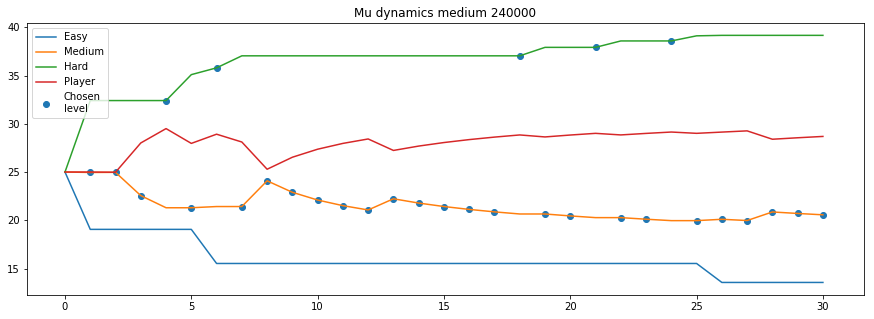

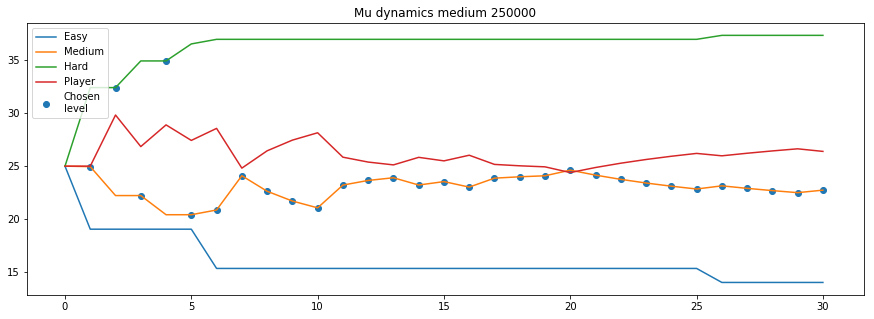

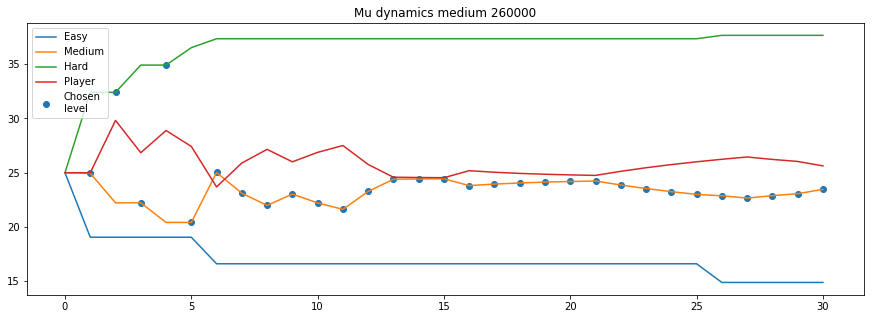

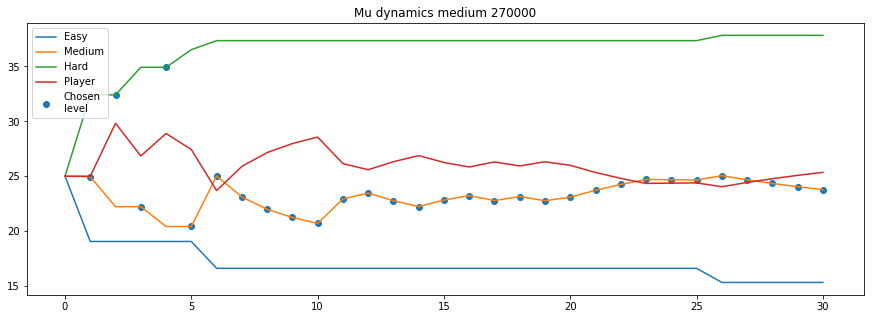

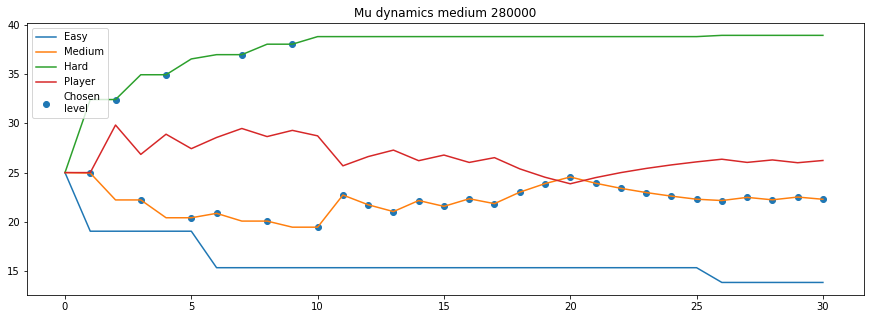

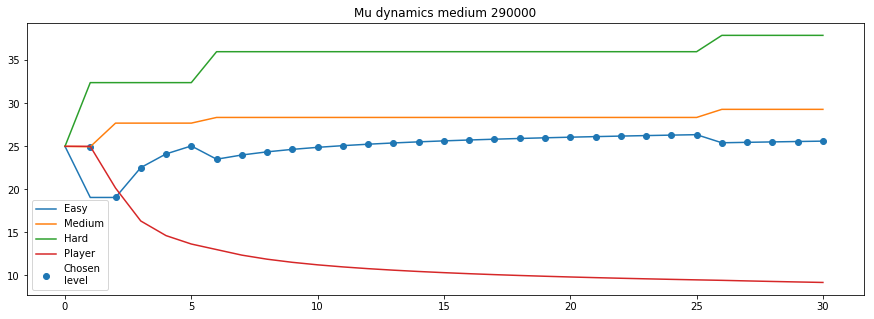

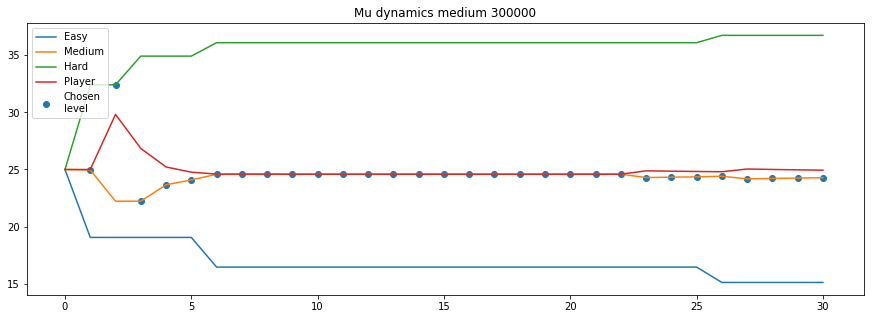

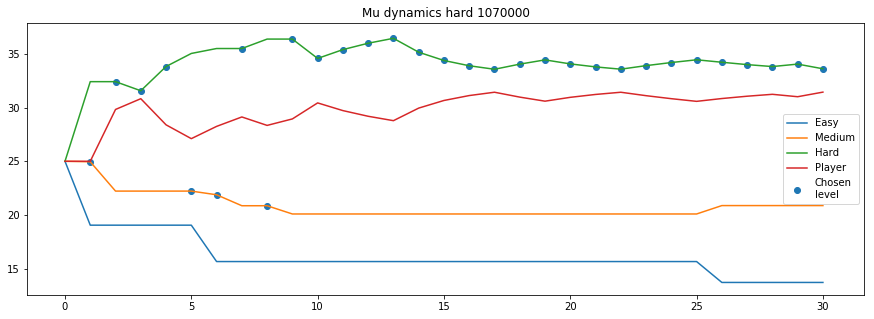

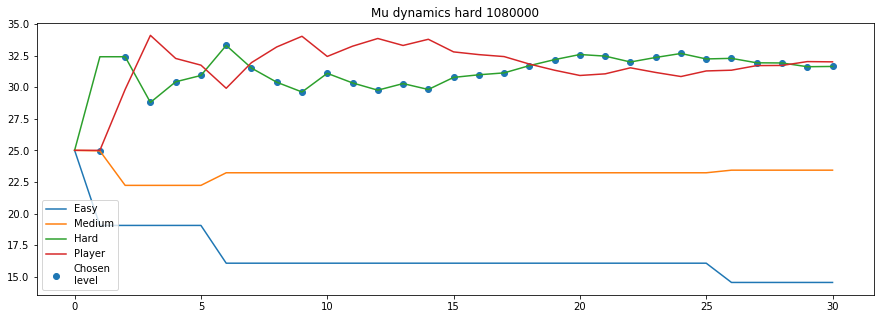

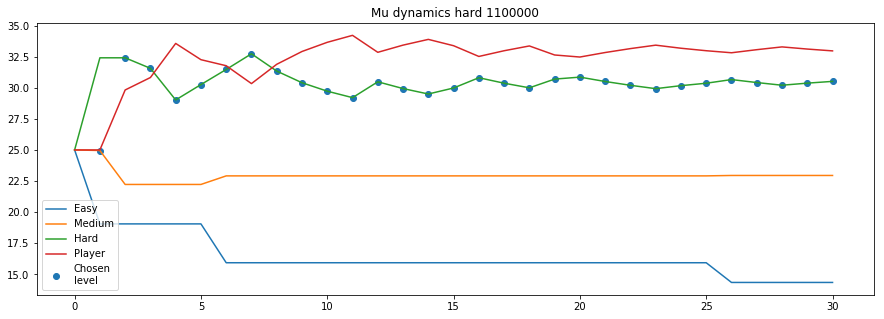

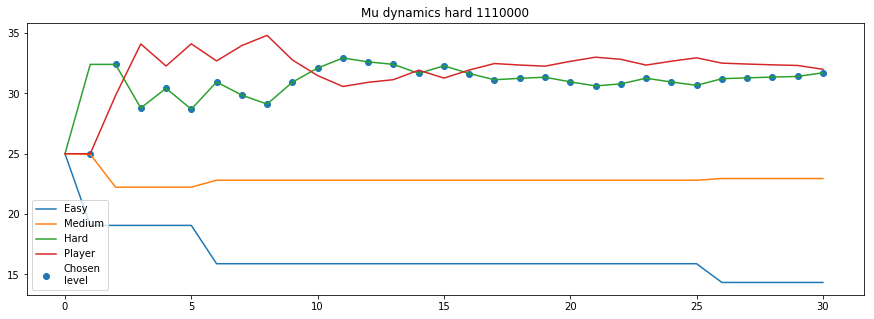

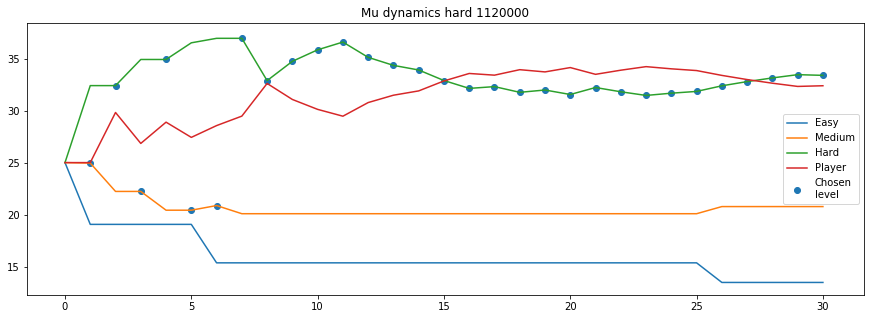

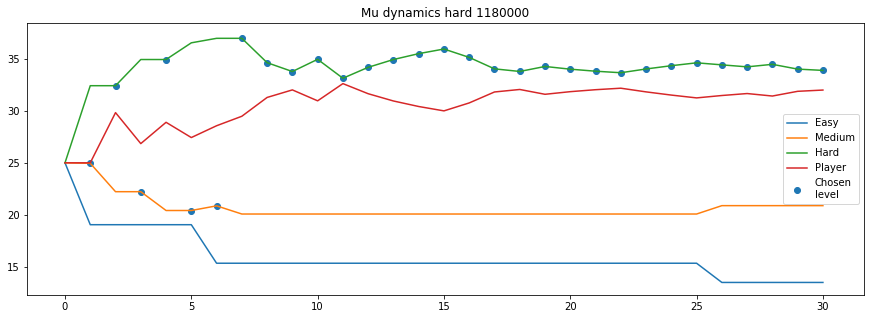

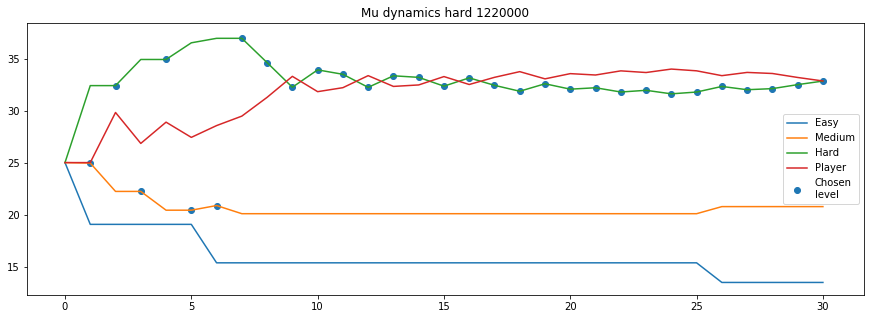

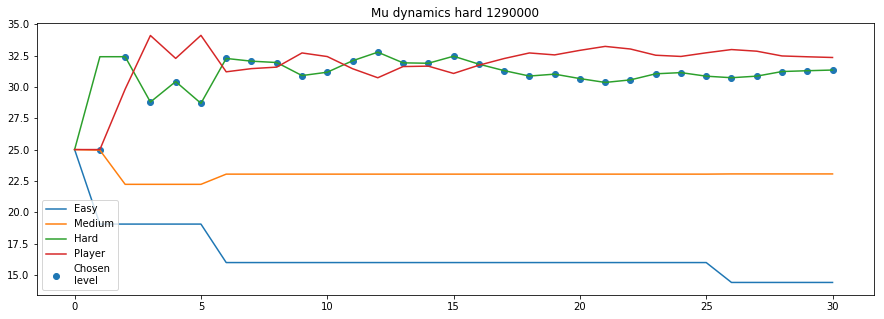

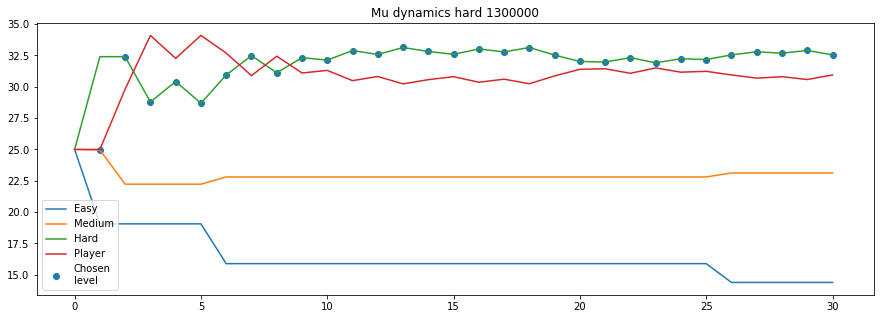

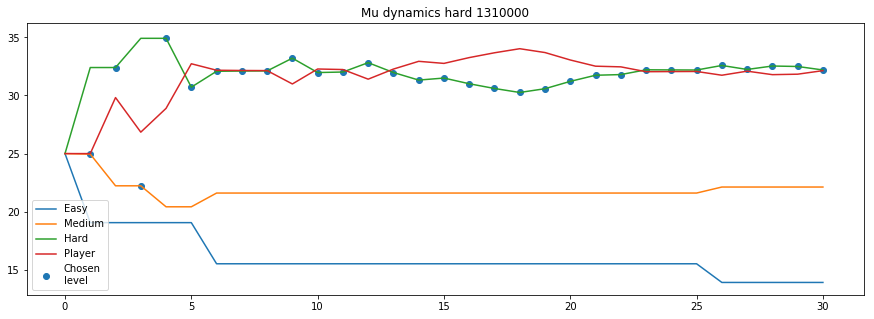

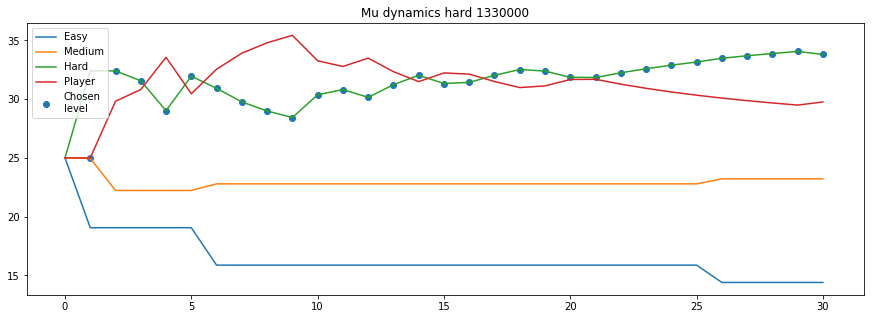

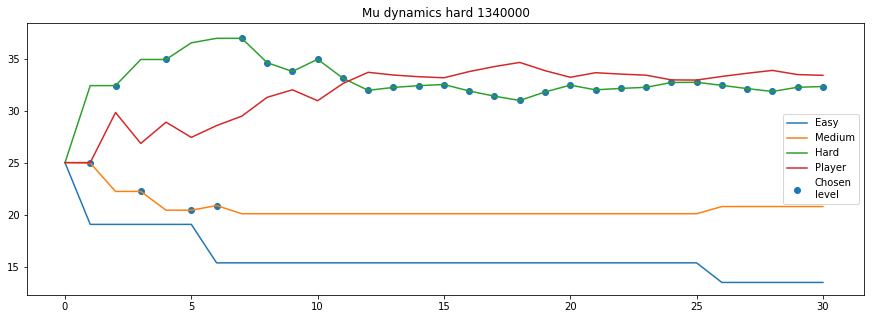

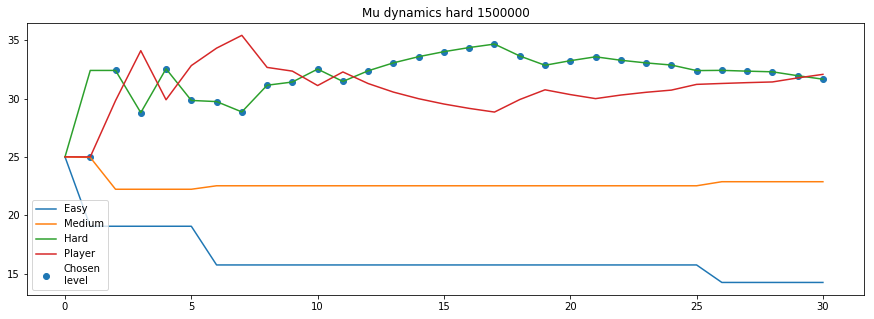

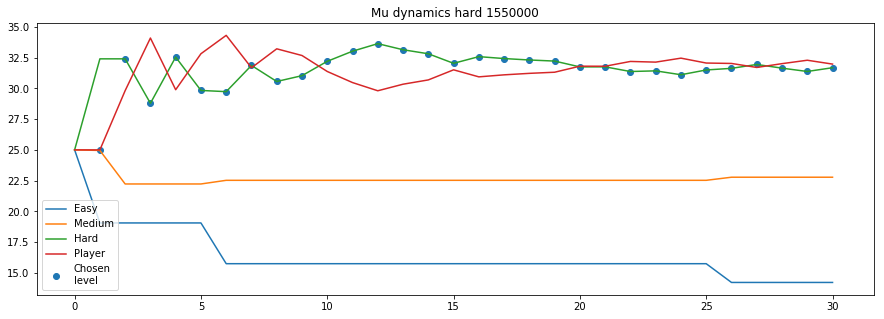

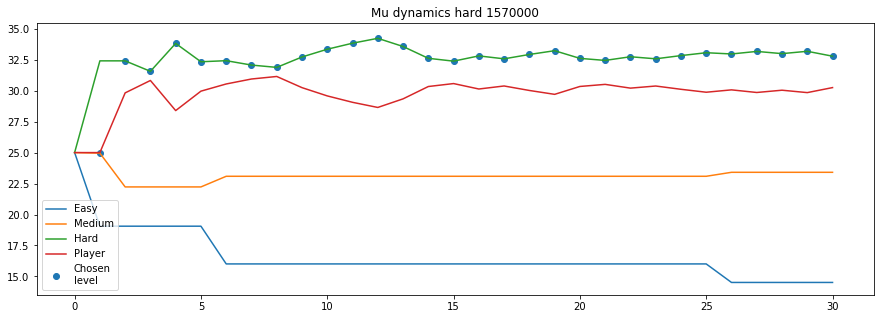

In [16]:
%store -r models
%store -r plot_list
%store -r opponents
save=False
for i in range(len(plot_list)):
    title = 'Mu dynamics' + ' ' + models[i][1] + ' ' + str(models[i][2])
    plot_(title, plot_list[i], opponents[i], save_plots=save)

In [6]:
#dumper.dump()

In [7]:
#remove_model_from_db(0)
#validation = validate_trueskill(models[0], 5)
#plot_('Ehehe', validation[0], validation[2])

INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
Expected level: 2
Chosen level:2


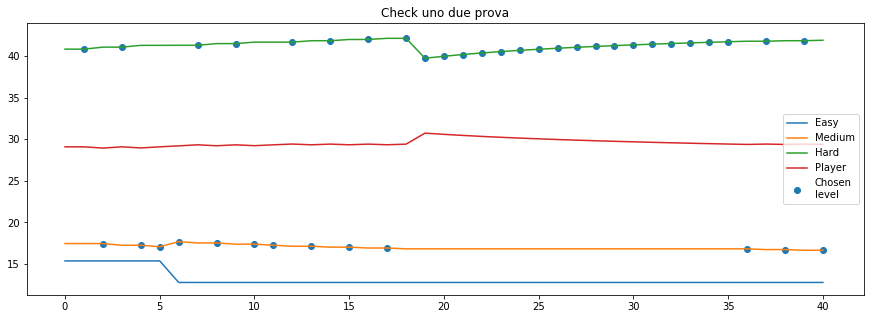

In [15]:
#model = models[3] # Medium 220000

#validation = validate_trueskill(model, 40)
plot_('Check uno due prova',validation[0], validation[2])

In [16]:
dumper.dump()

(1, 'easy', '250000', 22.914950798291002, 1.703426676714117, 20, 2)
#########################
easy 250000
	mu:22.914950798291002
	sigma:1.703426676714117
	games_played:20
	rank_update2
level:0
    mu:15.057921377847736
    sigma:5.301226878808214
level:1
    mu:28.012557367623785
    sigma:1.6806289911435044
level:2
    mu:34.99002433931944
    sigma:5.377935030587382
#########################
(2, 'easy', '320000', 25.216881916596027, 1.6065694150899719, 20, 2)
#########################
easy 320000
	mu:25.216881916596027
	sigma:1.6065694150899719
	games_played:20
	rank_update2
level:0
    mu:17.038058576357926
    sigma:4.16489063317276
level:1
    mu:24.643947019372863
    sigma:1.6079916510396892
level:2
    mu:34.76744129156977
    sigma:5.401491172414408
#########################
(3, 'easy', '330000', 23.81366870698209, 1.7879315884692883, 20, 2)
#########################
easy 330000
	mu:23.81366870698209
	sigma:1.7879315884692883
	games_played:20
	rank_update2
level:0
    mu:16.36

In [15]:
%store -r plot_list
%store -r opponents

def store_list(difficulty_train, model_id, mu_list, difficulty_play, cursor):
    if difficulty_play == 0:
        table = 'easy_dynamics'
    elif difficulty_play == 1:
        table = 'medium_dynamics'
    elif difficulty_play == 2:
        table = 'hard_dynamics'
    elif difficulty_play==3:
        table = 'player_dynamics'
    else:
        table = 'decision'
        
    for i in range(len(mu_list)):
        values = (table, difficulty_train, model_id, i, mu_list[i])
        cursor.execute('INSERT INTO ?(difficulty_train, model_id, idx, mu) VALUES(?,?,?,?)', values)
        
def store_list_(difficulty_train, model_id, mu_list, decision_list, cursor):        
    for i in range(len(decision_list)):
        values = (difficulty_train, model_id, i, mu_list[0][i], mu_list[1][i], mu_list[2][i], mu_list[3][i], decision_list[i])
        cursor.execute('INSERT INTO dynamics(difficulty_train, model_id, idx, mu_easy, mu_medium, mu_hard, mu_player, decision) VALUES(?,?,?,?,?,?,?,?)', values)


conn = sqlite3.connect('./data/trueskill_dynamics.db')
cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS dynamics (
    id integer PRIMARY KEY,
    difficulty_train text NOT NULL,
    model_id integer NOT NULL,
    idx integer,
    mu_easy real,
    mu_medium real,
    mu_hard real,
    mu_player real,
    decision real
)''')

for i  in range(len(models)):
    pl = plot_list[i]
    decision_list = opponents[i]
    model = models[i]
    difficulty_train = model[1]
    model_id = int(model[2])
    store_list_(difficulty_train, model_id, pl, decision_list, cur)

conn.commit()
conn.close()

In [14]:
conn = sqlite3.connect('./data/trueskill_dynamics.db')
cur = conn.cursor()

cur.execute('SELECT * FROM dynamics')
for row in cur.fetchall():
    print(row)
    
conn.close()

(1, 'easy', 160000, 0, 25.0, 25.0, 25.0, 25.0, 24.954666762339265)
(2, 'easy', 160000, 1, 19.05846666789949, 24.954666762339265, 32.404689484309614, 25.0, 32.404689484309614)
(3, 'easy', 160000, 2, 19.05846666789949, 22.227802480616873, 32.404689484309614, 29.819289972434596, 22.227802480616873)
(4, 'easy', 160000, 3, 19.05846666789949, 22.227802480616873, 34.918141899538206, 26.844428677053383, 34.918141899538206)
(5, 'easy', 160000, 4, 19.05846666789949, 20.421800263290454, 34.918141899538206, 28.889921768440626, 20.421800263290454)
(6, 'easy', 160000, 5, 19.05846666789949, 20.421800263290454, 36.52094341382607, 27.42557115029128, 20.86952790673592)
(7, 'easy', 160000, 6, 15.359013937520125, 20.86952790673592, 36.953709787272736, 28.559714310147342, 36.953709787272736)
(8, 'easy', 160000, 7, 15.359013937520125, 20.0841722348858, 36.953709787272736, 29.4708641411318, 20.0841722348858)
(9, 'easy', 160000, 8, 15.359013937520125, 20.0841722348858, 38.01517157238275, 28.65104528708216, 38

(902, 'medium', 300000, 1, 19.05846666789949, 24.954666762339265, 32.404689484309614, 25.0, 32.404689484309614)
(903, 'medium', 300000, 2, 19.05846666789949, 22.227802480616873, 32.404689484309614, 29.819289972434596, 22.227802480616873)
(904, 'medium', 300000, 3, 19.05846666789949, 22.227802480616873, 34.918141899538206, 26.844428677053383, 23.66112785033082)
(905, 'medium', 300000, 4, 19.05846666789949, 23.66112785033082, 34.918141899538206, 25.221032474472715, 24.08934327404955)
(906, 'medium', 300000, 5, 19.05846666789949, 24.08934327404955, 34.918141899538206, 24.764999628308022, 24.57949113525784)
(907, 'medium', 300000, 6, 16.463882209840463, 24.57949113525784, 36.09247151045226, 24.598396687725717, 24.582995153058775)
(908, 'medium', 300000, 7, 16.463882209840463, 24.582995153058775, 36.09247151045226, 24.59431812585968, 24.58485627922147)
(909, 'medium', 300000, 8, 16.463882209840463, 24.58485627922147, 36.09247151045226, 24.592232824929873, 24.58593591455153)
(910, 'medium', 